<center><u><h1>ML based NLP Project <br>Sentiment Analysis</center></u></h1>




Let's first begin with importing all the necessary libraries.Quickly go through the purpose of the libraries.<br>

1.   <b>Pandas</b>- for storing and analysing the data.
2.   <b>CountVectorizer</b>-to get the frequency of words.
3.   <b>re</b>-for locating and matching patterns in text.
4.   <b>PorterStemmer</b>-for stemming words.
5.   <b>nltk</b>-for accessing other packages like PorterStemmer and stopwords.
6.   <b>stopwords</b>-for removal os stopwords.
7.   <b>WordCloud</b>-for generating word cloud showing words according to their frequency in the text.
8.   <b>matplotlib</b>-for plotting some necessary graphs.
9.   <b>TfidVectorizer</b>-to generate word vectors based on the document weightage.






In [49]:
#importing pandas library
import pandas as pd
#import count vectorizer function from sklearn
from sklearn.feature_extraction.text import CountVectorizer
#importing re library
import re
#Importing stemmer function from NLTK library
from nltk.stem import PorterStemmer
#Importing NLTK library and stopwords.
from nltk.corpus import stopwords
#Importing Word cloud
import wordcloud
#Importing matplotlib library to plot pie chart.
import matplotlib.pyplot as plt
#importing tfiVectorizer from sklearn for feature extraction.
from sklearn.feature_extraction.text import TfidfVectorizer

The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that we use the drive library from google.colab and then mount the drive using mount function.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



After importing all the libraries, let's download the stopwords from nltk and load the english language stopwords in a variable using the words method from the stopwords class.

In [51]:
#downloading stopwords from nltk
import nltk
#loading englsih stopwords in the 'stop' variable
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In the next cell,



1.   porter(any name can be chosen) object of the PorterStemmer class is created as object is an instance of the class that can implement all the methods and functionalities of the class.
2.   count(any name can be chosen) object of the CountVectorizer class is created as object is an instance of the class that can implement all the methods and functionalities of the class.






In [52]:
#creating objects of PorterStemmer and CountVectorizer class
stem = PorterStemmer()
cv = CountVectorizer()

Next, we load the data into the 'data' variable using the 'read_csv' method from pandas. Don't forget to download the trainig data and upload it into the project location before implementing the project. Also we print the first five rows of the dataset using the 'head' method.



In [53]:
#Loading the data to the variable as DataFrame
data=pd.read_csv("/content/drive/MyDrive/Sentiment analysis.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1



In the next part, we segregate the data based on the positive and negative labels. Text with positive label is stored in 'pos' variable and text with negative label is stored in 'neg' variable.


In [54]:
#finding the positive Data
pos=data[data['label']==1]
print("Positive text \n",pos.head())
#try for negative Data
neg = data[data['label']==0]
print("Negative text \n",neg.head())

Positive text 
                                                  text  label
4   Im a die hard Dads Army fan and nothing will e...      1
6   Finally watched this shocking movie last night...      1
8   It may be the remake of 1987 Autumn's Tale aft...      1
9   My Super Ex Girlfriend turned out to be a plea...      1
10  I can't believe people are looking for a plot ...      1
Negative text 
                                                 text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
5  A terrible movie as everyone has said. What ma...      0


Here we can see that we have both postive and negative text in the data or dataset. So we can visulize the data by using matplotlib.





Now we plot a pie chart of the positive and negative data to understand the ratio of the data. Matplotlib library is used to plot the pie chart using various parameters. <br> Do refer to the given documentation to know more about the used parameters: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html


([<matplotlib.patches.Wedge at 0x781c46be8af0>,
 [Text(-0.8415928487661641, 0.7083230032306255, 'Positive'),
  Text(0.9946097303600124, -0.8371090038180116, 'Negative')],
 [Text(-0.459050644781544, 0.3863580017621593, '50.0%'),
  Text(0.6120675263753922, -0.5151440023495455, '50.0%')])

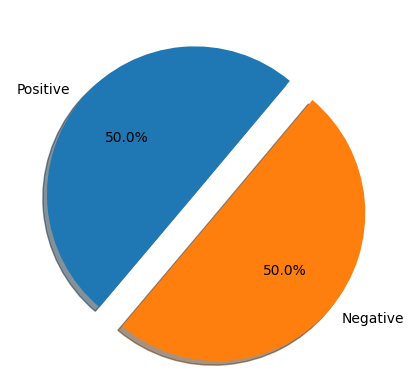

In [56]:
#Plotting the Postive vs Negative in piechart.

fig, ax = plt.subplots()

temp = [pos['label'].count(), neg['label'].count()]
ax.pie(temp,labels=['Positive','Negative'],shadow=True,autopct='%1.1f%%',startangle=50,explode=(0,0.2))


We can see that the percentage of positive and negative data is equal i.e. 50% each. Which means that there is enough training data of both the classes.

Next, we define a preprocessing function using regular expressions to clean the data and remove unnecessary things in the text. <br>Any of the html tags are represented by '<[^>]*>' and replaced with a whitespace. Non word characters are replaced with a whitespace and the text is converted into lowercase. Emoji symbols in the text are joined at the end of the text by replacing the '-' in the emoji with a whitespace.
<br>
<br>Do refer to the given documentation to know more about Regular expressions: https://docs.python.org/3/library/re.html



In [57]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [58]:
data.iloc[:,0]

0        I grew up (b. 1965) watching and loving the Th...
1        When I put this movie in my DVD player, and sa...
2        Why do people who do not know what a particula...
3        Even though I have great interest in Biblical ...
4        Im a die hard Dads Army fan and nothing will e...
                               ...                        
39995    "Western Union" is something of a forgotten cl...
39996    This movie is an incredible piece of work. It ...
39997    My wife and I watched this movie because we pl...
39998    When I first watched Flatliners, I was amazed....
39999    Why would this film be so good, but only gross...
Name: text, Length: 40000, dtype: object

In [59]:
#Defining preprocessing function to process the data
def preprocess(text):
  text = re.sub('<[^>]*>', ' ',text)
  emoji = re.findall("(?::|;\=)(?:-)?(?:\)|\(|D|P)",text)
  text = re.sub('[\W]+'," ", text.lower()) +' '.join(emoji).replace('-',' ')
  return text


The above defined function is now applied to each text in the row using the apply function in python.


In [60]:
#Applying the function preprocess on the data

data['text'] = data['text'].apply(preprocess)
data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [61]:
data['text'][0]

'i grew up b 1965 watching and loving the thunderbirds all my mates at school watched we played thunderbirds before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from 5 became an art form i took my children to see the movie hoping they would get a glimpse of what i loved as a child how bitterly disappointing the only high point was the snappy theme tune not that it could compare with the original score of the thunderbirds thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created jonatha frakes should hand in his directors chair his version was completely hopeless a waste of film utter rubbish a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp sapiens was a huge error of judgment '

Lets display the top 5 rows of the preprocessed data to check exactly what changes have been made. We use the head function of pandas for this.


As we can see, all the text is converted into lowercase and other unnecessary stuff is removed.


Next, a function tokenize is defined which returns the spillted form of the text. The split function from strings is used for splitting the text into tokens. A sample sentence has been passed into the tokenizer function that we created to check the output.



In [62]:
#Defining a function called tokenizer which splits the sentence
def tokenizer(text):
  #your code here for splitting
  return text.split()


In [63]:
# tokenizer(data['text'][0])


Here, a function tokenizer_porter is defined that stems the splitted words using the stem function from PorterStemmer class.


In [64]:
#Defining function for Tokenizer porter
def tokenizer_porter(text):
    #your code for here for porter
    ps = [stem.stem(text) for text in text.split()]
    return ps

In [65]:
tokenizer_porter(data['text'][0])

['i',
 'grew',
 'up',
 'b',
 '1965',
 'watch',
 'and',
 'love',
 'the',
 'thunderbird',
 'all',
 'my',
 'mate',
 'at',
 'school',
 'watch',
 'we',
 'play',
 'thunderbird',
 'befor',
 'school',
 'dure',
 'lunch',
 'and',
 'after',
 'school',
 'we',
 'all',
 'want',
 'to',
 'be',
 'virgil',
 'or',
 'scott',
 'no',
 'one',
 'want',
 'to',
 'be',
 'alan',
 'count',
 'down',
 'from',
 '5',
 'becam',
 'an',
 'art',
 'form',
 'i',
 'took',
 'my',
 'children',
 'to',
 'see',
 'the',
 'movi',
 'hope',
 'they',
 'would',
 'get',
 'a',
 'glimps',
 'of',
 'what',
 'i',
 'love',
 'as',
 'a',
 'child',
 'how',
 'bitterli',
 'disappoint',
 'the',
 'onli',
 'high',
 'point',
 'wa',
 'the',
 'snappi',
 'theme',
 'tune',
 'not',
 'that',
 'it',
 'could',
 'compar',
 'with',
 'the',
 'origin',
 'score',
 'of',
 'the',
 'thunderbird',
 'thank',
 'earli',
 'saturday',
 'morn',
 'one',
 'televis',
 'channel',
 'still',
 'play',
 'rerun',
 'of',
 'the',
 'seri',
 'gerri',
 'anderson',
 'and',
 'hi',
 'wife',


Ahead we segregate the processed data into positive and negative data based on the labels.



In [66]:
#getting positive
positive_data = data[ data['label'] == 1]
positive_data = positive_data['text']
#try to get negative data
negative_data = data[data['label'] == 0]
negative_data = negative_data['text']

In [67]:
positive_data

4        im a die hard dads army fan and nothing will e...
6        finally watched this shocking movie last night...
8        it may be the remake of 1987 autumn s tale aft...
9        my super ex girlfriend turned out to be a plea...
10       i can t believe people are looking for a plot ...
                               ...                        
39992    although i agree that it s a good but not grea...
39995     western union is something of a forgotten cla...
39996    this movie is an incredible piece of work it e...
39998    when i first watched flatliners i was amazed i...
39999    why would this film be so good but only gross ...
Name: text, Length: 19981, dtype: object

In [68]:
negative_data

0        i grew up b 1965 watching and loving the thund...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
5        a terrible movie as everyone has said what mad...
                               ...                        
39984    i couldn t relate to this film it failed to en...
39985    comedy what s so funny about watching an ugly ...
39993     the best movie of the 90 s the welsh trainspo...
39994    my girlfriend has the habit of going to blockb...
39997    my wife and i watched this movie because we pl...
Name: text, Length: 20019, dtype: object


Now we define a function that will plot the word cloud for our data. The words 'movie' and 'film' are ignored for cleaning the words. Next the wordcloud is formed by giving various parameters like stopwords, background colour, etc.
Refer to the given documentation: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/



In [69]:
#Defining the function to plot the data in wordcloud
from wordcloud import WordCloud
def plot_wordcloud(data, color = 'white'):
  words = ' '.join(data)
  clean_words = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
  wordcloud = WordCloud(stopwords=stop,width = 2500, height = 2000, background_color=color, random_state=10).generate(clean_words)
  #your code for plotiing in wordcloud
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()



Now that we have the word cloud plotting function, we will plot the word cloud for the positive data using white background colour.


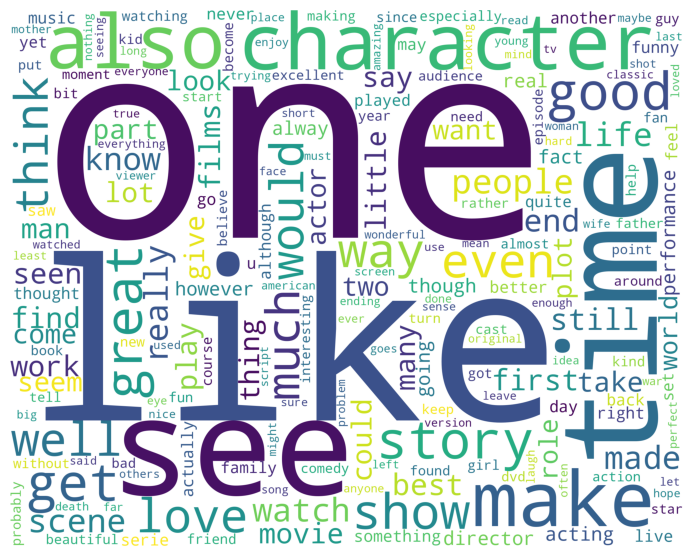

In [70]:
plot_wordcloud(positive_data,'white')


The word cloud is plotted and we see that the most occuring words are one, like, character. Other words can also be seen with different frequencies.


Next, we will plot the word cloud for the negative data using black background colour.



Negative words


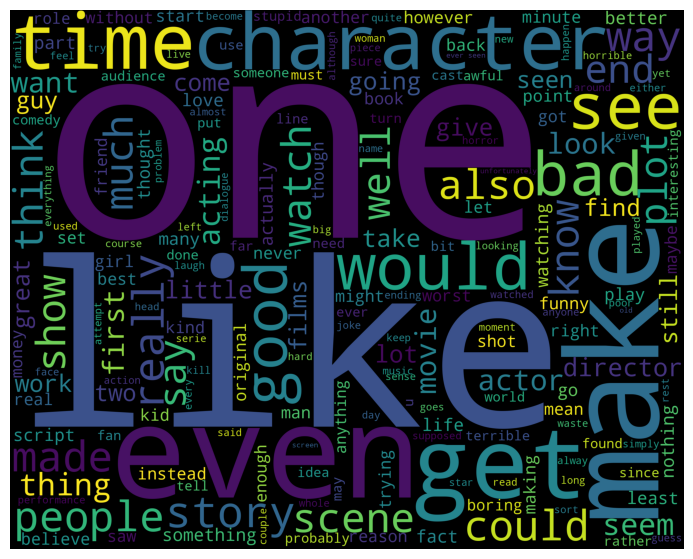

In [71]:
#Printing the negative data in wordcloud
# try for negative words
print("Negative words")
plot_wordcloud(negative_data,'black')


After plotting we see that words like even,one,like,character,get,scene,etc have higher frequencies of appearing in the text.

Next, tfid object of the TfidVectorizer class is created by giving various parameters. The tokenizer_porter function that we defined earlier has been passed as the tokenizer in this vectorizer. Know more about the parameters at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html



In [72]:
data.label.values

array([0, 0, 0, ..., 0, 1, 1])

In [73]:
#using TfidVectorizer
tfidf = TfidfVectorizer(lowercase = False,tokenizer=tokenizer_porter)
#assigning values in y i.e label.values
y = data.label.values


Next, the data is scaled using fit_transform function into the x variable which means that vectorization has been applied to the data and stored into the x variable which will be further used for training.


In [74]:
data.text

0        i grew up b 1965 watching and loving the thund...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
                               ...                        
39995     western union is something of a forgotten cla...
39996    this movie is an incredible piece of work it e...
39997    my wife and i watched this movie because we pl...
39998    when i first watched flatliners i was amazed i...
39999    why would this film be so good but only gross ...
Name: text, Length: 40000, dtype: object

In [75]:
#scaling the data - Fitting tfidf on the data text
x = tfidf.fit_transform(data.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [76]:
x.shape

(40000, 64912)

In [77]:
y.shape

(40000,)


It is time to split our data as it is now ready for further processing. train_test_split from sklearn helps us to do that. It will split the data into training and testing data so that we can check the model accuracy easily by referring or comparing with the original values in tha dataset. test size is taken as 0.5 which means that 50% of the data is for training and remaining 50% for testing. The splitted data is stored in four different variables.<br>
X_train: independent training data<br>
X_test: independent testing data<br>
y_train: prediction of the training data (labels in this case)<br>
y_test: prediction of the testing data(labels in this case)



In [78]:
 #splitting the train and test split using train_test_split function of sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1 )

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26800, 64912), (13200, 64912), (26800,), (13200,))


Now we import the LogisticRegressionCV module from sklearn which will be used to train the model. This regressor comes with cross validation so that there is no need to implement cross validation seperately. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. For example, a logistic regression could be used to predict whether a political candidate will win or lose an election or whether a high school student will be admitted to a particular college. Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations.
<br>

Refer the given documentation to know more about LogisticRegressionCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
<br>
<br>



A model is created by passing various parameters. Number of folds in cross validation is given as 6, scoring is estimated based on accuracy and maximum iterations are set to 500 (you may try out with some other values). The model is then fitted on the training data and further predicted on the test data(X_train) to get y_pred which is the predicted labels.



In [80]:
#Importing Logisitic RegressionCV from sklearn library
from sklearn.linear_model import LogisticRegressionCV
#create model of LogisticRegression of cv=6,scoring of accuracy and max_iter=500 #cv - cros validation (Like k-fold cross validation)
model = LogisticRegressionCV(cv=6,scoring='accuracy',max_iter=500,random_state=0)
#fiting our model
model.fit(X_train,y_train)
#making predication using predict
y_pred = model.predict(X_test)


Wohoo!! our model is trained. Its time to check how well it has learnt everything. For that we use accuracy_score from metrics package of the sklearn library. The predicted labels and actual test labels are passed as parameters to get the accuracy score.


In [82]:
#Importing metrics from sklesrn to calculate accuracy
from sklearn.metrics import accuracy_score
# Accuracy of our built model
print('Accuracy of model :'accuracy_score(y_test,y_pred))

Accuracy of model : 0.896439393939394



That's cool, 89% is the accuracy of our model.